# Plotting of Evaluation Results: Decision Times

Compare number of decisions and time for decisions between different algorithms.
Take decisions per flow, node, and in total into account.

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display

result_dir = 'decision_results'
runs = ['60', '61']
config = 'hc'
network = 'dfn_58.graphml'
ing = '0.3'
algos = ['gpasp', 'spr2', 'bjointsp', 'bjointsp_recalc']
labels = ['Greedy', 'Score', 'B-JointSP', 'B-JointSP Re.']

In [155]:
df = None
for run in runs:
    for i, algo in enumerate(algos):
        df_tmp = pd.read_csv(f'{result_dir}/{run}/{config}/{network}/{ing}/{algo}/agg_decisions.csv')
        df_tmp['run'] = run
        df_tmp['algorithm'] = labels[i]
        # create df for first algo
        if df is None:
            df = df_tmp.copy()
        # then append
        else:
            df = df.append(df_tmp)
        
df.head()

,flow,node,dec_count,dec_time_avg,dec_time_std,run,algorithm
0,1,pop0,2,0.000186,0.000009,60,Greedy
1,1,pop1,1,0.000187,0.000000,60,Greedy
2,1,pop53,3,0.000185,0.000006,60,Greedy
3,1,pop50,2,0.000265,0.000078,60,Greedy
4,1,pop14,1,0.000185,0.000000,60,Greedy


In [156]:
# total decisions per algo
df_sum_total = df.groupby(['algorithm', 'run']).sum().reset_index().drop(columns=['flow'])
df_sum_total

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,60,4487,809.564816,0.000000
1,B-JointSP,61,3365,576.444923,0.000000
2,B-JointSP Re.,60,6237,783.110461,13.120893
3,B-JointSP Re.,61,4770,586.711449,8.482268
4,Greedy,60,44274,5.082745,0.514045
5,Greedy,61,49273,5.452347,0.508136
6,Score,60,39340,32.858386,29.508450
7,Score,61,34335,25.724968,20.799941


In [157]:
# per node decisions per algo
df_sum_by_node = df.groupby(['algorithm', 'node', 'run']).sum().drop(columns=['flow'])
# display(df_sum_by_node)
df_sum_by_node = df_sum_by_node.groupby(['algorithm', 'run']).mean().reset_index()
# df_sum_by_node_std = df_sum_by_node.groupby('algorithm').std().reset_index()
df_sum_by_node

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,60,4487.000000,809.564816,0.000000
1,B-JointSP,61,3365.000000,576.444923,0.000000
2,B-JointSP Re.,60,6237.000000,783.110461,13.120893
3,B-JointSP Re.,61,4770.000000,586.711449,8.482268
4,Greedy,60,763.344828,0.087634,0.008863
5,Greedy,61,849.534483,0.094006,0.008761
6,Score,60,819.583333,0.684550,0.614759
7,Score,61,660.288462,0.494711,0.399999


In [158]:
# per flow decisions per algo
df_sum_by_flow = df.groupby(['algorithm', 'flow', 'run']).sum()
# display(df_sum_by_flow)
df_sum_by_flow = df_sum_by_flow.groupby(['algorithm', 'run']).mean().reset_index()
# df_sum_by_flow_std = df_sum_by_flow.groupby('algorithm').std().reset_index()
df_sum_by_flow

,algorithm,run,dec_count,dec_time_avg,dec_time_std
0,B-JointSP,60,1.000000,0.180425,0.000000
1,B-JointSP,61,1.000000,0.171306,0.000000
2,B-JointSP Re.,60,1.435113,0.180191,0.003019
3,B-JointSP Re.,61,1.400470,0.172258,0.002490
4,Greedy,60,9.929132,0.001140,0.000115
5,Greedy,61,14.949333,0.001654,0.000154
6,Score,60,8.864353,0.007404,0.006649
7,Score,61,10.191451,0.007636,0.006174


In [159]:
# concat dfs for long format
df_sum_total['agg'] = 'Total'
df_sum_by_node['agg'] = 'Per Node'
df_sum_by_flow['agg'] = 'Per Flow'
df_all = df_sum_total.append([df_sum_by_flow, df_sum_by_node])
df_all.head()


,algorithm,run,dec_count,dec_time_avg,dec_time_std,agg
0,B-JointSP,60,4487.0,809.564816,0.000000,Total
1,B-JointSP,61,3365.0,576.444923,0.000000,Total
2,B-JointSP Re.,60,6237.0,783.110461,13.120893,Total
3,B-JointSP Re.,61,4770.0,586.711449,8.482268,Total
4,Greedy,60,44274.0,5.082745,0.514045,Total


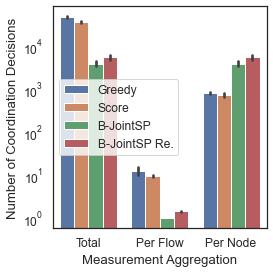

In [160]:
# plot num decisions
fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.1, style='white')

sns.barplot('agg', 'dec_count', hue='algorithm', hue_order=labels, data=df_all, ax=ax)
ax.set_xlabel('Measurement Aggregation')
ax.set_ylabel('Number of Coordination Decisions')
ax.set_yscale('log')

# remove legend title
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)
    
# save
plt.tight_layout()
network_name = network.replace('.graphml', '')
ing_str = ing.replace('.', '')
fig.savefig(f'plots/{network_name}_{config}_{ing_str}_decisions.pdf')

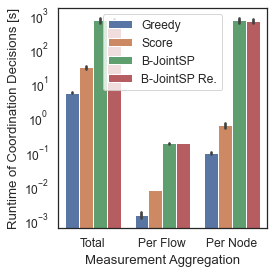

In [161]:
# plot runtimes
fig, ax = plt.subplots(figsize=(4, 4))
sns.set(font_scale=1.1, style='white')

sns.barplot('agg', 'dec_time_avg', hue='algorithm', hue_order=labels, data=df_all, ax=ax)
ax.set_xlabel('Measurement Aggregation')
ax.set_ylabel('Runtime of Coordination Decisions [s]')
ax.set_yscale('log')

# remove legend title
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

# save
plt.tight_layout()
network_name = network.replace('.graphml', '')
ing_str = ing.replace('.', '')
fig.savefig(f'plots/{network_name}_{config}_{ing_str}_runtime.pdf')